### Задача с семинара II.8.4

$$ A = \begin{pmatrix}
-2 & 1 \\
0 & 2
\end{pmatrix};\ \vec{f} = \begin{pmatrix}
3 \\
1
\end{pmatrix}$$

$$ B = A^T A = \begin{pmatrix}
4 & -2 \\
-2 & 5
\end{pmatrix};\ \vec{g} = A^T \vec{f} = \begin{pmatrix}
-6 \\
5
\end{pmatrix} $$

Итерационный процесс выглядит следующим образом: $ \vec{x}^{(p+1)} = ( E - \tau B ) \vec{x}^{(p)} + \tau \vec{ g }$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def TauOpt( A ):
    
    LambdaMax = max( np.linalg.eig( A )[ 0 ] )
    
    LambdaMin = min( np.linalg.eig( A )[ 0 ] )
    
    return 2.0 / ( LambdaMax + LambdaMin )

In [3]:
def Norm3( vec ):
    
    S = 0.0
    
    for v in vec:
        
        S += np.fabs( v ) ** 2
        
    return np.sqrt( S )

In [18]:
A = np.asarray( [ [ 2., 3., -1. ], [ 2., 1., 1 ], [ -1, -4, 4 ] ] )

f = np.asarray( [ 0., -1., 2 ] )

B = np.dot( A.transpose(), A )

g = np.dot( A.transpose(), f )

R = np.eye( 3 ) - TauOpt( B ) * B

phi = TauOpt( B ) * g

TauOpt( B )

0.04494008479085595

### Отслеживание решения по невязке

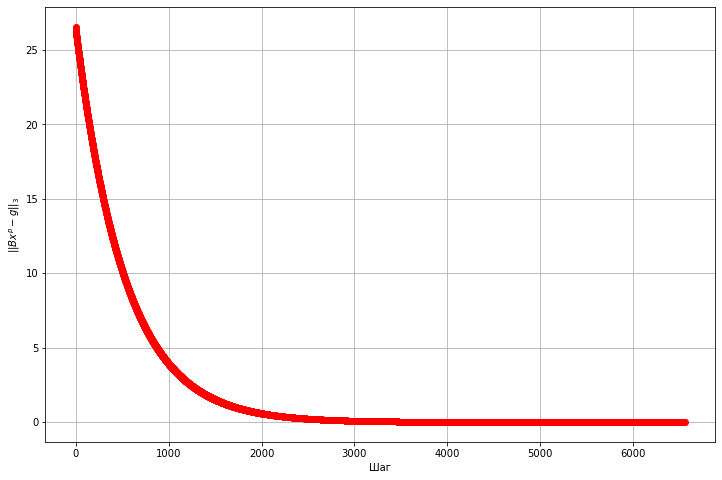

In [19]:
plt.figure( figsize = ( 12, 8 ) )
plt.grid()
plt.xlabel( r'Шаг' )
plt.ylabel( r'$ || Bx^{p} - g ||_{3} $' )

x = np.zeros( 3 )

x[ 0 ] = 1.

k = 0

eps = 1.0e-4

while Norm3( np.dot( B, x ) - g ) > eps:
    
    k += 1
    
    x = np.dot( R, x ) + phi
    
    plt.plot( [ k, ], [ Norm3( np.dot( B, x ) - g ), ], 'ro' )

In [20]:
print( 'Решение системы =', x )

Решение системы = [-3.999983    3.74998527  3.24998588]


In [21]:
np.dot( A, x )

array([ 3.93208098e-06, -9.99994844e-01,  1.99998545e+00])

### Отслеживание решения по приближению к точному

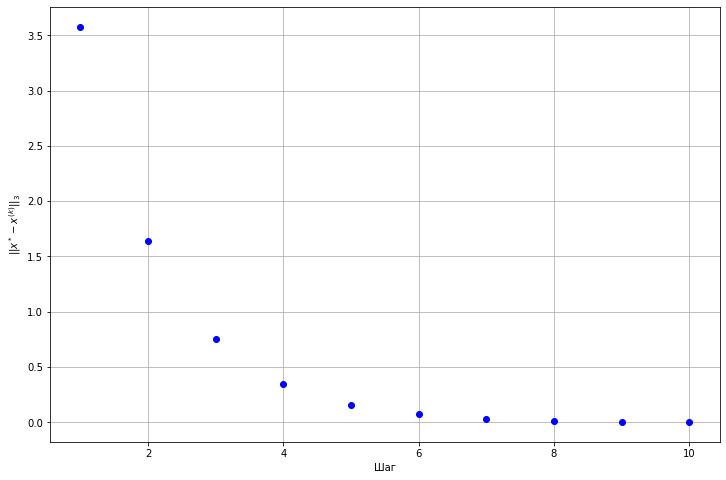

In [219]:
plt.figure( figsize = ( 12, 8 ) )
plt.grid()
plt.xlabel( r'Шаг' )
plt.ylabel( r'$ || x^* - x^{(k)} ||_{3} $' )

x = np.zeros( 2 )

k = 0

eps = 1.0e-3

while Norm3( np.linalg.solve( B, g ) - x ) > eps:
    
    k += 1
    
    x = np.dot( R, x ) + phi
    
    plt.plot( [ k, ], [ Norm3( np.dot( B, x ) - g ), ], 'bo' )

In [220]:
print( 'Решение системы =', x )

Решение системы = [-1.24949099  0.49979639]


### Отслеживание решения по двум соседним значениям

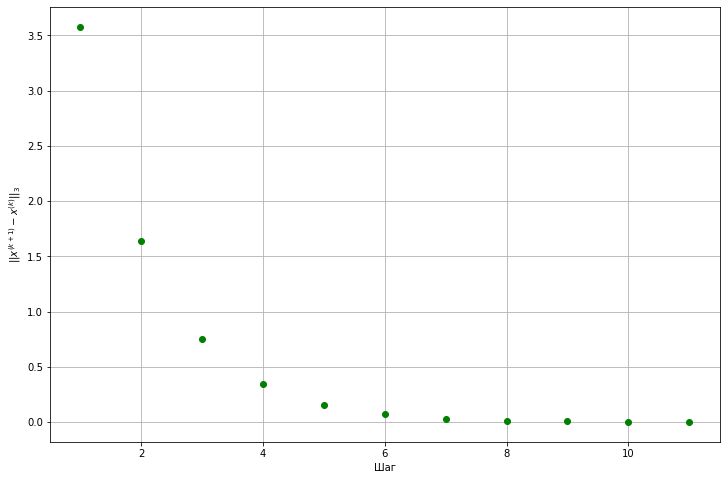

In [221]:
plt.figure( figsize = ( 12, 8 ) )
plt.grid()
plt.xlabel( r'Шаг' )
plt.ylabel( r'$ || x^{(k+1)} - x^{(k)} ||_{3} $' )

x = np.zeros( 2 )

k = 0

eps = 1.0e-3

x_old = np.ones( 2 ) * 1.0

while Norm3( x_old - x ) > eps:
    
    k += 1
    
    x_old = np.copy( x )
    
    x = np.dot( R, x ) + phi
    
    plt.plot( [ k, ], [ Norm3( np.dot( B, x ) - g ), ], 'go' )

In [222]:
print( 'Решение системы =', x )

Решение системы = [-1.25003393  0.50024885]
